In [159]:
import pandas as pd            ## this used for manipulation
import matplotlib.pyplot as plt          #this  used for visualization
import numpy as np                      # this is used for numeric calculation
import seaborn as sns           #this used for advanced visualization
import warnings
warnings.filterwarnings('ignore')

#Step:2 Load_Breast_Cancer_Dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset =  load_breast_cancer()
cancer_dataset    # This data is in the form of Dictionary

cancer_dataset.keys() # Here we check about keys in data


#Therefore the "Target" stores values of malignant or begnign tumors. and in output "Target value" shows their name.
cancer_dataset['target_names']

#So, 0 means Malignant Tumor--> Patient has not suffering from breast_cancer
#    1 means Benign Tumor-----> Patients have a breast_cancer


#Create DataFrame
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
                        columns = np.append(cancer_dataset['feature_names'],['target']))

# Create DataFrame by concate 'data' and 'target' together
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
                        columns = np.append(cancer_dataset['feature_names'],['target']))

#cancer_df.to_csv("breast_cancer_dataframe.csv") #Just save dataset in csv file

Number of Benign:  357
Number of Malignant :  212


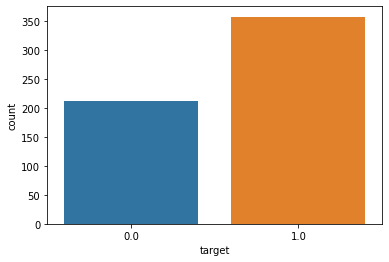

In [160]:
y = cancer_df['target']
x = cancer_df.drop(['target'],axis = 1)
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)


# violin plot

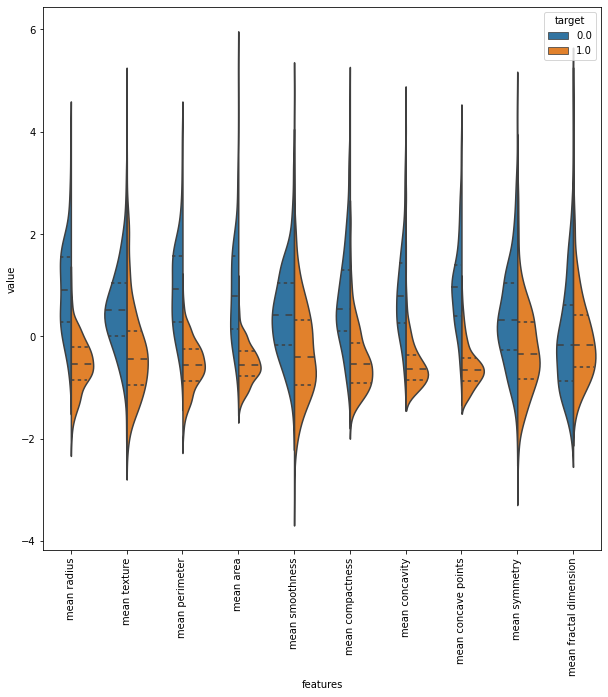

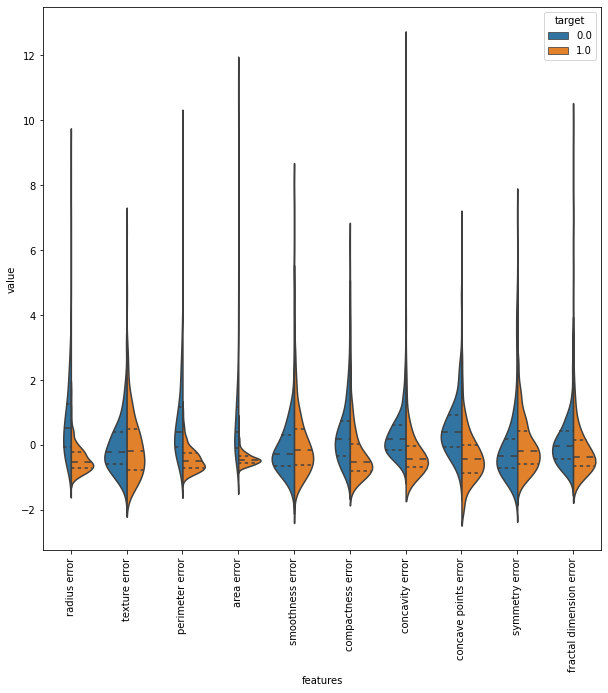

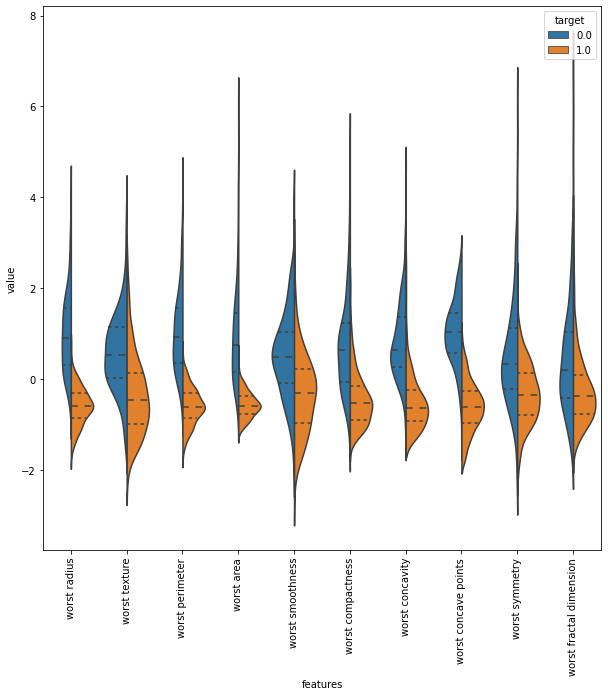

In [161]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90);
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90);
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

Interpretons les graphes precedents , par example pour le texture_mean feature la mediane de malignant et Benign sont séparés cela veut dire qu'on peut avoir une bonne classification. Le meme raisonnement s'applique au reste.

#  Correlation

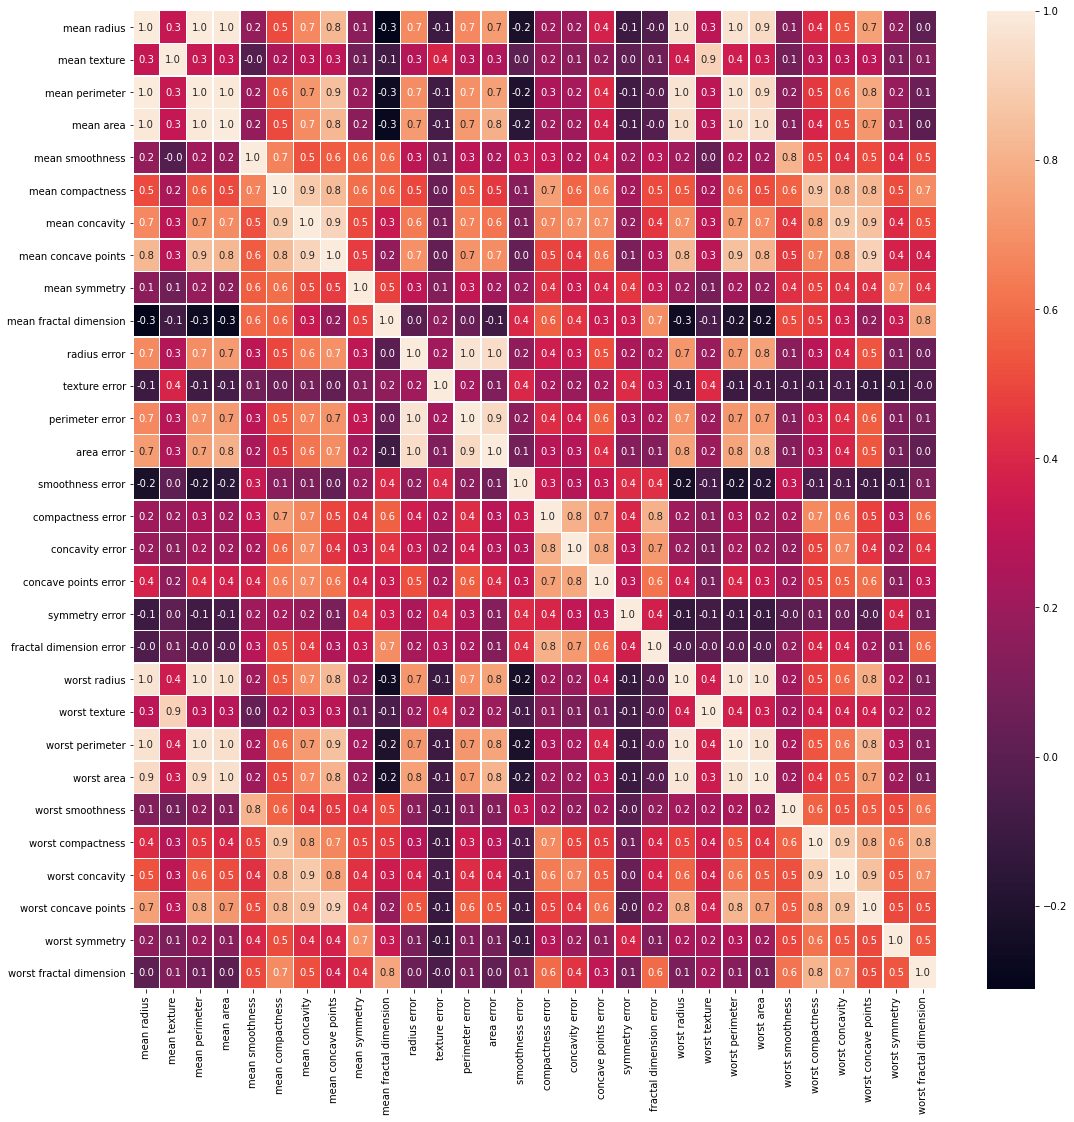

In [162]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

On va enlever la liste des features correlés et ensuite refaire le heatmap pour verifier que on a rien oublier 

In [163]:
drop_list1 = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error','worst radius','worst perimeter','worst compactness','worst concave points','compactness error','concavity error','worst texture','worst area']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()
x_1.shape

(569, 16)

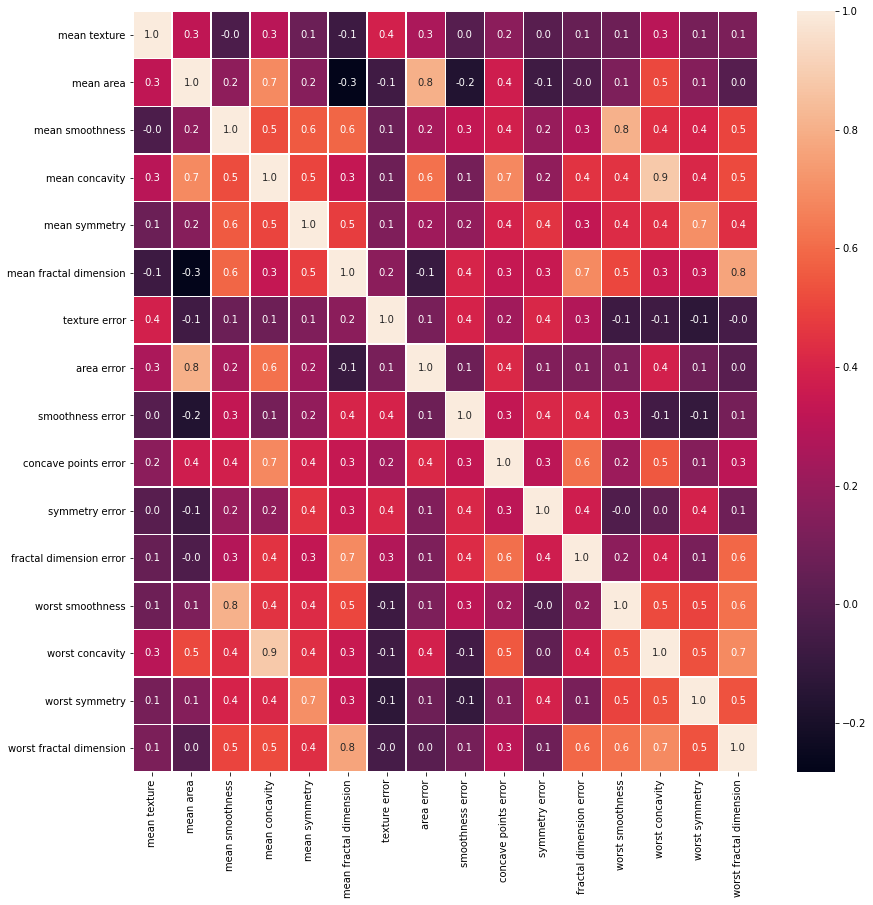

In [164]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

On a mnt la liste des features non correlés

# Models

Accuracy is:  0.9707602339181286


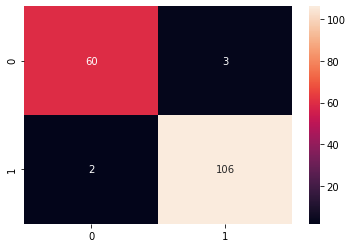

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

acc_models = {}
cm_models = {}
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");
acc_models['randomforest'] = ac
cm_models['randomforest'] = cm


Accuracy is:  0.9473684210526315


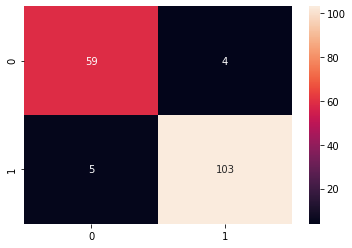

In [166]:
# regression logistic

clf_rf = LogisticRegression(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");
acc_models['logreg'] = ac
cm_models['logreg'] = cm

Accuracy is:  0.8888888888888888


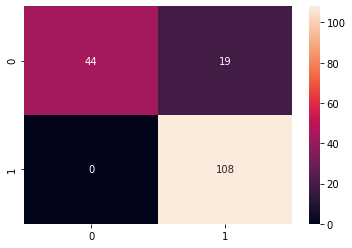

In [167]:
# regression logistic

clf_rf = SVC(random_state=43, probability=True)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");
acc_models['SVC'] = ac
cm_models['SVC'] = cm

Accuracy is:  0.9064327485380117


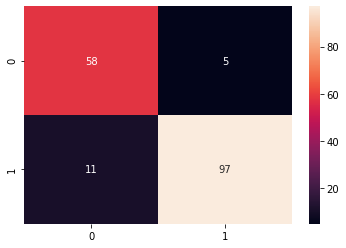

In [168]:
# decisions tree
clf_rf = DecisionTreeClassifier(random_state=42)     
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");
acc_models['SVC'] = ac
cm_models['SVC'] = cm

Accuracy is:  0.9415204678362573


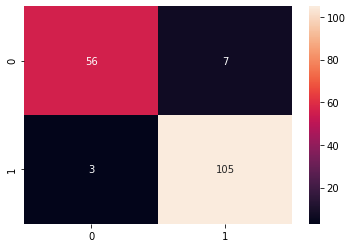

In [169]:
# xgboost

clf_rf =  xgb.XGBClassifier(random_state=42,learning_rate=0.01)    
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");
acc_models['XGB'] = ac
cm_models['XGB'] = cm

In [170]:
# best model
acc_models
# randomforest est le meilleur choix avec une selection de features

{'randomforest': 0.9707602339181286,
 'logreg': 0.9473684210526315,
 'SVC': 0.9064327485380117,
 'XGB': 0.9415204678362573}

# features selections

In [147]:
# maintenant on va se focaliser sur random forest 
# 5 meilleurs features

from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('5 best features by rfe:')
for i in x_train.columns[rfe.support_]:
    print('   -',i)


5 best features by rfe:
   - mean area
   - mean concavity
   - area error
   - worst concavity
   - worst symmetry


In [148]:
# nombre features pr meilleur accuracy
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :')
for i in x_train.columns[rfecv.support_]:
    print('  -', i)

Optimal number of features : 12
Best features :
  - mean texture
  - mean area
  - mean smoothness
  - mean concavity
  - mean fractal dimension
  - area error
  - concave points error
  - fractal dimension error
  - worst smoothness
  - worst concavity
  - worst symmetry
  - worst fractal dimension


Feature ranking:
1. feature 3 (0.236854)
2. feature 1 (0.178175)
3. feature 7 (0.155833)
4. feature 13 (0.127185)
5. feature 0 (0.056695)
6. feature 14 (0.042384)
7. feature 9 (0.034014)
8. feature 12 (0.032498)
9. feature 5 (0.022082)
10. feature 2 (0.021728)
11. feature 15 (0.020185)
12. feature 11 (0.018398)
13. feature 4 (0.016396)
14. feature 8 (0.013524)
15. feature 10 (0.012063)
16. feature 6 (0.011985)


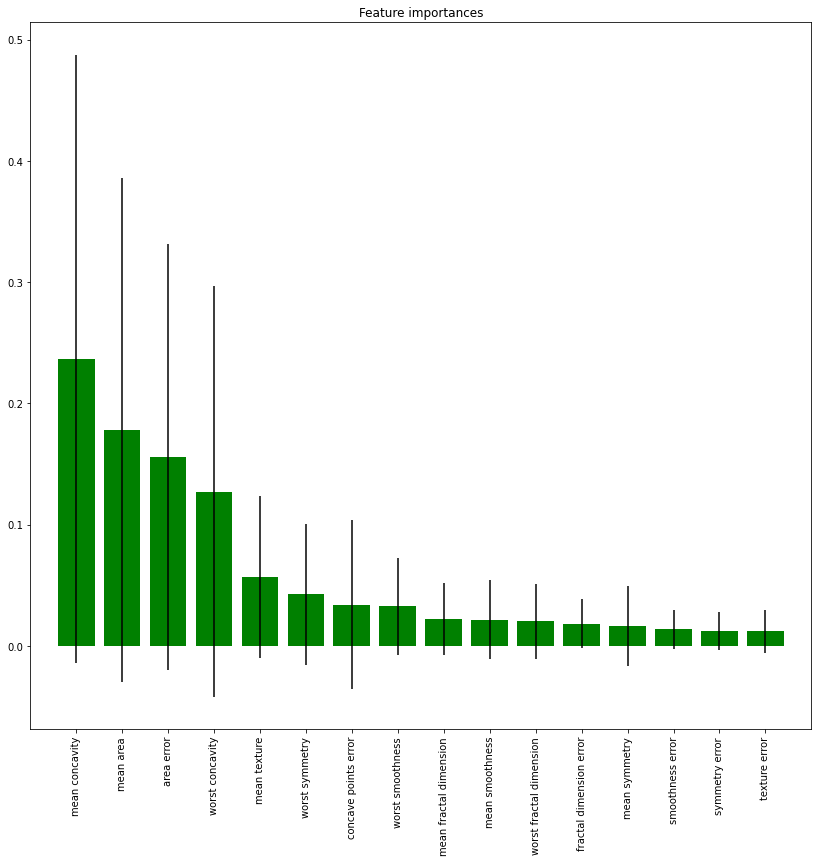

In [152]:

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# save model

In [175]:
%%writefile new_cancer.py 
import pandas as pd            
import matplotlib.pyplot as plt         
import numpy as np                   
import seaborn as sns          
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import joblib

cancer_dataset =  load_breast_cancer()
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],columns = np.append(cancer_dataset['feature_names'],['target']))
y = cancer_df['target']
x = cancer_df.drop(['target'],axis = 1)
# see the notebook for more explications on choice dropping these features
drop_list1 = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error','worst radius','worst perimeter','worst compactness','worst concave points','compactness error','concavity error','worst texture','worst area']
x_1 = x.drop(drop_list1,axis = 1 ) 
# see the notebook for explanantion on choice of model

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
print('CM is: ',cm)
#sns.heatmap(cm,annot=True,fmt="d");
joblib.dump(clf_rf,"new_model")
#loaded_model = joblib.load("model")
#result = loaded_model.score(x_test, y_test)

 


Writing new_cancer.py
